In [1]:
import scvelo as scv
import scanpy as sc
import pandas as pd 
import numpy as np 
import os 
from pathlib import Path

## Create sample for $\alpha$, $\gamma$, $\beta$ for the simulation

In [2]:
notebook_dir = os.getcwd()
notebook_dir

'/Users/omercagatay/Desktop/Thesis/git_repo/SALMON/notebooks/data simulation'

In [3]:
wd_path = Path(os.getcwd()).parents[3]
wd_path

PosixPath('/Users/omercagatay/Desktop/Thesis')

In [4]:
os.chdir(wd_path)

## Mouse Gut Distribution 

In [5]:
df = pd.read_csv('data/Xenium_V1_mouse_pup_outs/df_fit_gut.csv')

In [6]:
df = df.drop(columns="Unnamed: 0")
df

,fit_r2,fit_alpha,fit_beta,fit_gamma,fit_t_,fit_scaling,fit_std_u,fit_std_s,fit_likelihood,fit_u0,fit_s0,fit_pval_steady,fit_steady_u,fit_steady_s,fit_variance,fit_alignment_scaling
0,0.619933,0.546798,1.522130,0.625981,3.843892,0.268412,0.107489,0.186216,2.445005e-01,0.0,0.0,0.347507,0.303894,0.483618,0.815471,1.046362
1,0.579508,0.499826,0.606630,0.440862,5.530427,0.900662,0.205798,0.193270,9.163533e-12,0.0,0.0,0.481301,0.712707,0.737987,1.869471,1.511240
2,0.680274,0.573378,0.961751,0.467210,6.114822,0.736802,0.161633,0.281526,1.456418e-01,0.0,0.0,0.479338,0.475621,0.780537,0.876799,1.811032
3,0.420349,0.257072,0.236089,0.359716,5.706502,2.909045,0.341416,0.117364,9.489126e-02,0.0,0.0,0.414510,0.985273,0.400270,1.367230,1.456045
4,0.595622,0.322573,0.571391,0.405949,5.140571,1.235056,0.195962,0.163955,1.284752e-01,0.0,0.0,0.379312,0.501361,0.484589,1.037628,1.464268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,0.800318,1.659356,1.358778,1.070937,5.160029,0.387097,0.310550,0.379065,2.924008e-07,0.0,0.0,0.488151,1.153832,0.973845,0.586847,0.855547
235,0.908627,5.529716,4.616502,1.445125,11.831148,0.173908,0.155548,0.477525,2.031971e-10,0.0,0.0,0.499516,1.666831,3.706990,14.653369,0.577740
236,0.017557,0.038118,0.250024,0.056674,25.065950,0.578723,0.049751,0.124653,2.860715e-07,0.0,0.0,0.419656,0.138074,0.386954,0.613346,10.522147
237,0.848321,3.042380,1.066401,0.913453,3.833278,0.479479,0.734130,0.723445,2.490621e-01,0.0,0.0,0.477670,1.969437,2.056540,0.567553,0.880081


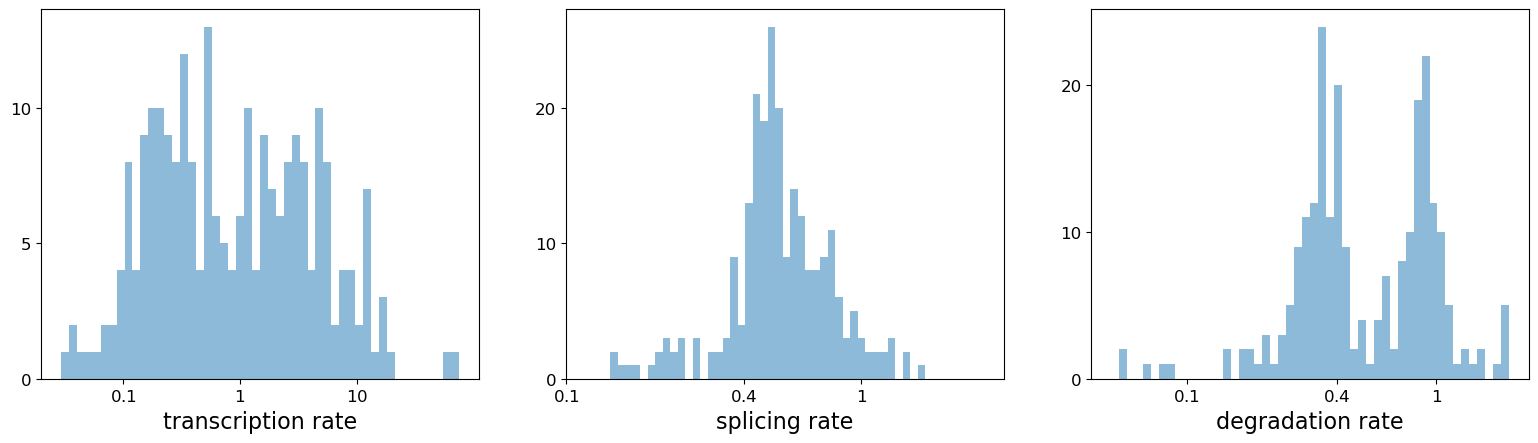

In [7]:
kwargs = dict(xscale='log', fontsize=16)
with scv.GridSpec(ncols=3) as pl:
    pl.hist(df['fit_alpha'], xlabel='transcription rate', **kwargs)
    pl.hist(df['fit_beta'] * df['fit_scaling'], xlabel='splicing rate', xticks=[.1, .4, 1], **kwargs)
    pl.hist(df['fit_gamma'], xlabel='degradation rate', xticks=[.1, .4, 1], **kwargs)

In [8]:
df_par = df[["fit_alpha","fit_beta","fit_gamma"]]

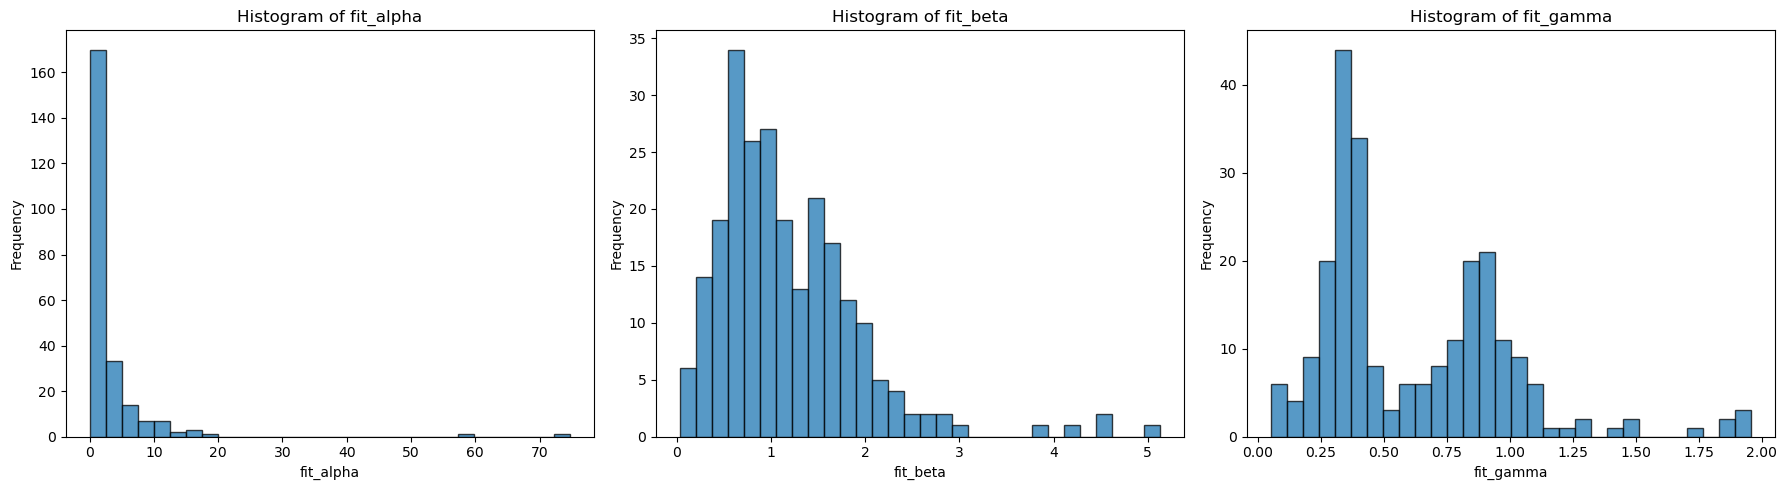

In [9]:
import matplotlib.pyplot as plt

# Plot histograms of the three columns side by side
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(df_par.columns):
    axs[i].hist(df_par[col], bins=30, alpha=0.75, edgecolor='black')
    axs[i].set_title(f'Histogram of {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## Sample From the prior distribution

### log normal - multivariate dist

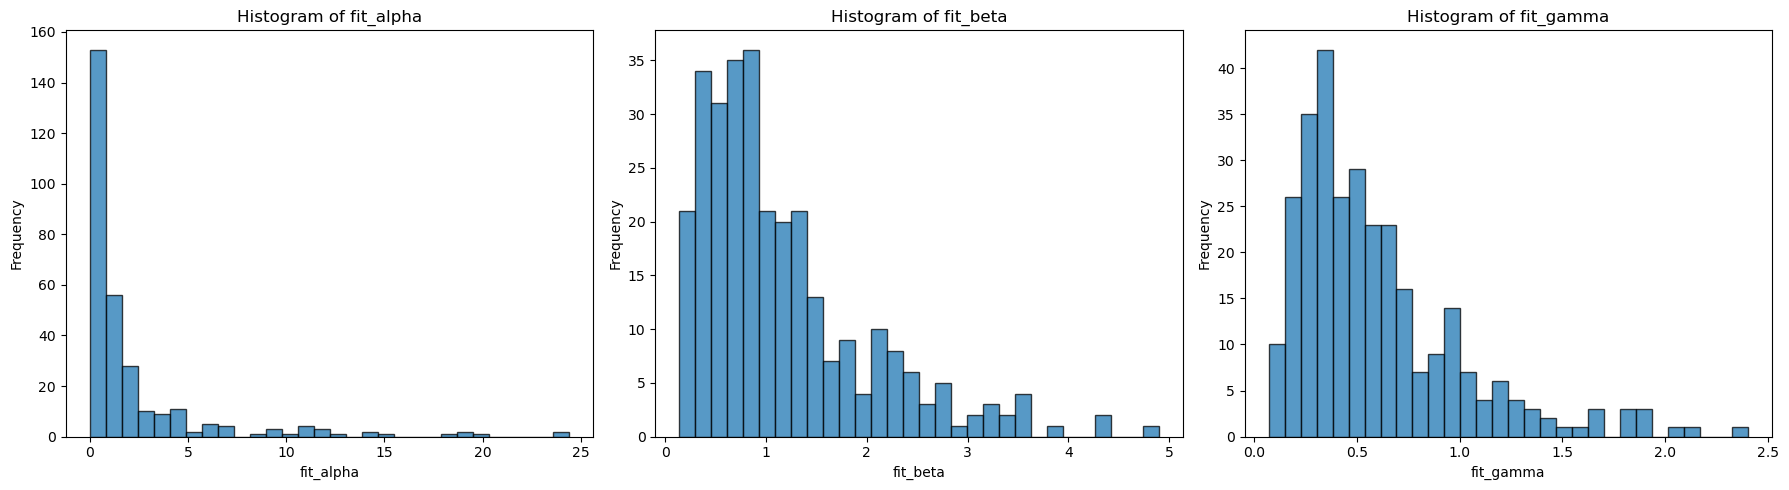

In [10]:
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt


# Log-transform the data to handle positive-only values
log_df = np.log(df_par)

# Calculate the means and covariance matrix of the log-transformed data
means = log_df.mean().values
cov_matrix = log_df.cov().values

# Generate a sample from the multivariate normal distribution
sample_size = 300  # Size of the sample you want to draw
mv_normal_sample = multivariate_normal.rvs(mean=means, cov=cov_matrix, size=sample_size)

# Convert the sample back from log-space to the original space
sample_df = pd.DataFrame(np.exp(mv_normal_sample), columns=df_par.columns)

# Plot histograms of the three columns side by side
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(sample_df.columns):
    axs[i].hist(sample_df[col], bins=30, alpha=0.75, edgecolor='black')
    axs[i].set_title(f'Histogram of {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [68]:
alpha_list = sample_df["fit_alpha"].to_list()
beta_list = sample_df["fit_beta"].to_list()
gamma_list = sample_df["fit_gamma"].to_list()

In [70]:
adata = scv.datasets.simulation(n_obs=5000, n_vars=300, alpha = alpha_list, beta = beta_list, gamma = gamma_list)

In [72]:
sc.pp.filter_cells(adata,min_counts = 20)
sc.pp.filter_genes(adata,min_cells = 4)
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

In [73]:
# pca, neighbours, umap, leiden
sc.pp.pca(adata)
sc.pp.neighbors(adata,n_neighbors=15,n_pcs=0)
sc.tl.umap(adata,min_dist=0.05)
sc.tl.leiden(adata, resolution=0.5)

In [74]:
scv.pp.moments(adata, n_pcs=None, n_neighbors=None)

computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [75]:
scv.tl.recover_dynamics(adata)

recovering dynamics (using 1/8 cores)
    finished (0:01:40) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


In [76]:
scv.tl.velocity(adata, mode='dynamical')

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [77]:
scv.tl.velocity_graph(adata)

computing velocity graph (using 1/8 cores)
    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


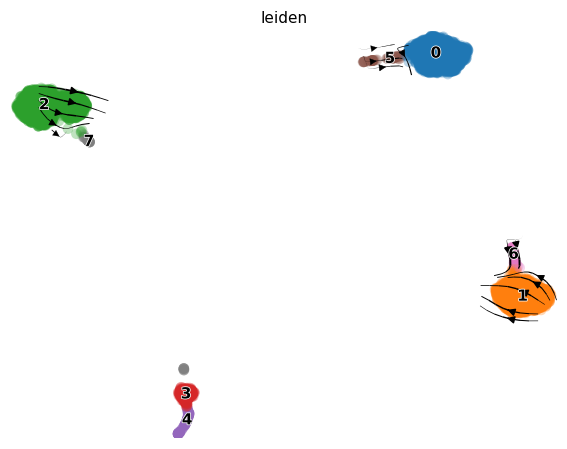

In [78]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    scv.pl.velocity_embedding_stream(adata, basis='umap',color="leiden", dpi=110)
    # scv.pl.velocity_embedding_stream(adata, basis='spatial',color="leiden")

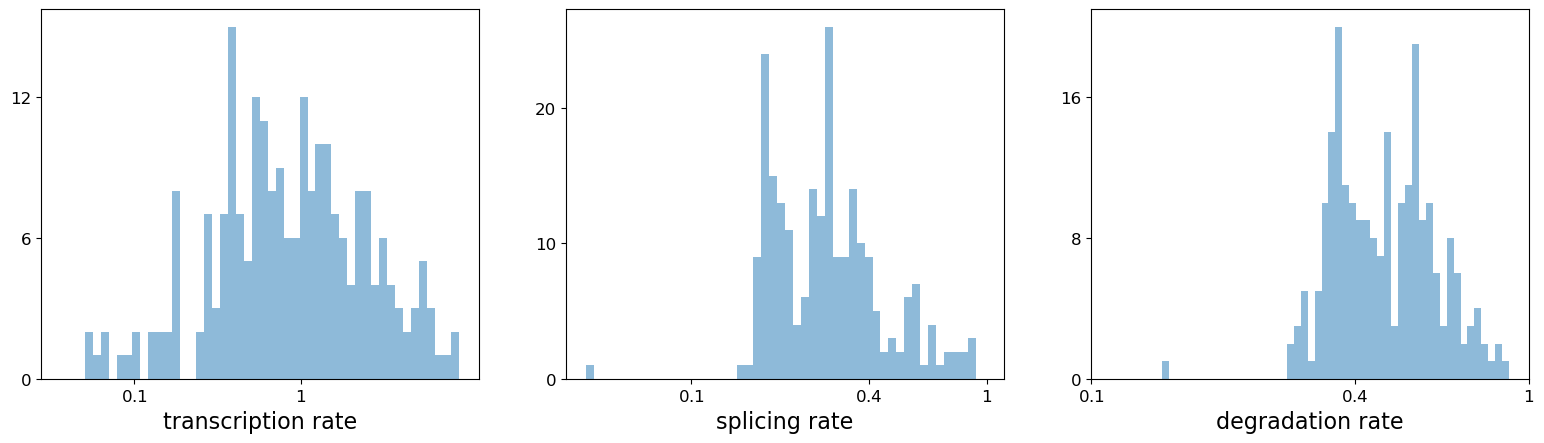

,fit_r2,fit_alpha,fit_beta,fit_gamma,fit_t_,fit_scaling,fit_std_u,fit_std_s,fit_likelihood,fit_u0,fit_s0,fit_pval_steady,fit_steady_u,fit_steady_s,fit_variance,fit_alignment_scaling
0,0.987807,0.575513,0.753879,0.563337,13.105498,0.376003,0.347135,0.446225,3.019449,0.0,0.0,0.113262,0.769053,0.994708,0.009502,1.705117
1,0.992320,7.845858,0.637100,0.328553,19.446361,0.262222,5.085170,9.841767,3.052939,0.0,0.0,0.459389,11.880716,22.239793,0.006005,2.893150
3,0.982293,2.202693,0.603514,0.525590,14.801143,0.437993,0.916945,1.062460,0.428997,0.0,0.0,0.461765,3.604166,4.238152,0.255100,1.828489
4,0.983057,0.289098,0.759249,0.681566,10.055857,0.468811,0.163575,0.183180,3.496013,0.0,0.0,0.003371,0.365020,0.412174,0.004641,1.404713
5,0.983173,1.484315,0.767585,0.685951,9.762949,0.452660,0.790927,0.886748,3.240476,0.0,0.0,0.152774,1.860596,2.100010,0.005280,1.391066


In [79]:
df = adata.var
df = df[(df['fit_likelihood'] > .1) & df['velocity_genes'] == True]
kwargs = dict(xscale='log', fontsize=16)
with scv.GridSpec(ncols=3) as pl:
    pl.hist(df['fit_alpha'], xlabel='transcription rate', **kwargs)
    pl.hist(df['fit_beta'] * df['fit_scaling'], xlabel='splicing rate', xticks=[.1, .4, 1], **kwargs)
    pl.hist(df['fit_gamma'], xlabel='degradation rate', xticks=[.1, .4, 1], **kwargs)

scv.get_df(adata, 'fit*', dropna=True).head()

### truncated normal 

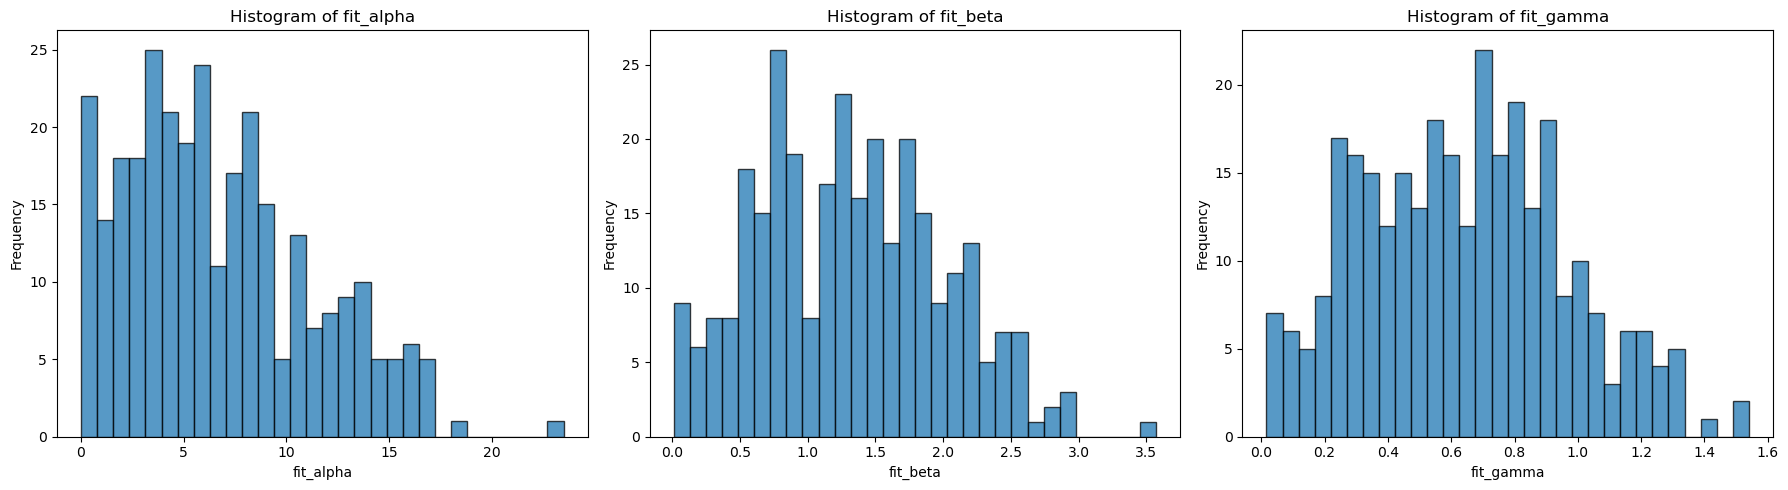

In [80]:
from scipy.stats import truncnorm
import matplotlib.pyplot as plt

# Calculate the means, standard deviations, and correlation matrix
means = df_par.mean().values
stds = df_par.std().values
corr_matrix = df_par.corr().values

# Generate a sample from the truncated multivariate normal distribution
def truncated_normal(mean, sd, low, upp, size):
    a, b = (low - mean) / sd, (upp - mean) / sd
    return truncnorm.rvs(a, b, loc=mean, scale=sd, size=size)

sample_size = 300  # Size of the sample you want to draw
sample = np.zeros((sample_size, len(means)))

for i in range(len(means)):
    sample[:, i] = truncated_normal(means[i], stds[i], 0, np.inf, sample_size)

# Convert the sample to a DataFrame
sample_df = pd.DataFrame(sample, columns=df_par.columns)

# Plot histograms of the three columns side by side
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(sample_df.columns):
    axs[i].hist(sample_df[col], bins=30, alpha=0.75, edgecolor='black')
    axs[i].set_title(f'Histogram of {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


### copula function 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm
from copulas.multivariate import GaussianMultivariate
from copulas.univariate import GaussianKDE, Gaussian

# Example data
np.random.seed(0)
df = pd.DataFrame({
    'Column1': np.abs(np.random.normal(1, 0.5, 100)),
    'Column2': np.abs(np.random.normal(5, 2, 100)),
    'Column3': np.abs(np.random.normal(3, 1, 100))
})

# Fit marginal distributions (here using Gaussian KDE for simplicity)
marginals = [GaussianKDE() for _ in df.columns]
for col, marginal in zip(df.columns, marginals):
    marginal.fit(df[col])

# Transform data to uniform marginals
uniform_data = np.zeros_like(df)
for i, col in enumerate(df.columns):
    uniform_data[:, i] = marginals[i].cdf(df[col])

# Fit a Gaussian copula to the uniform data
copula = GaussianMultivariate()
copula.fit(pd.DataFrame(uniform_data, columns=df.columns))

# Generate samples from the copula
sample_size = 100
copula_samples = copula.sample(sample_size).values

# Transform back to the original space using the inverse CDF
sample_df = pd.DataFrame(np.zeros_like(copula_samples), columns=df.columns)
for i, col in enumerate(df.columns):
    sample_df[col] = marginals[i].ppf(copula_samples[:, i])

# Plot histograms of the three columns side by side
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(sample_df.columns):
    axs[i].hist(sample_df[col], bins=30, alpha=0.75, edgecolor='black')
    axs[i].set_title(f'Histogram of {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [30]:
import matplotlib.pyplot as plt

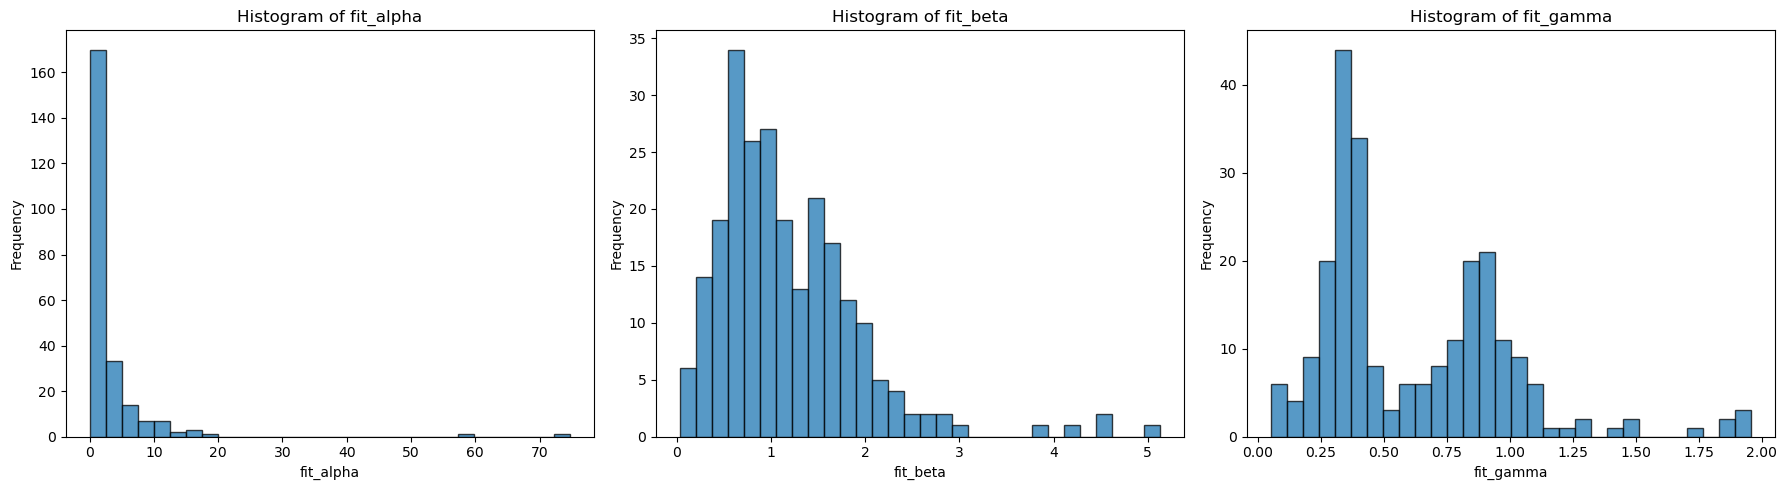

In [32]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(sample_df.columns):
    axs[i].hist(df[col], bins=30, alpha=0.75, edgecolor='black')
    axs[i].set_title(f'Histogram of {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

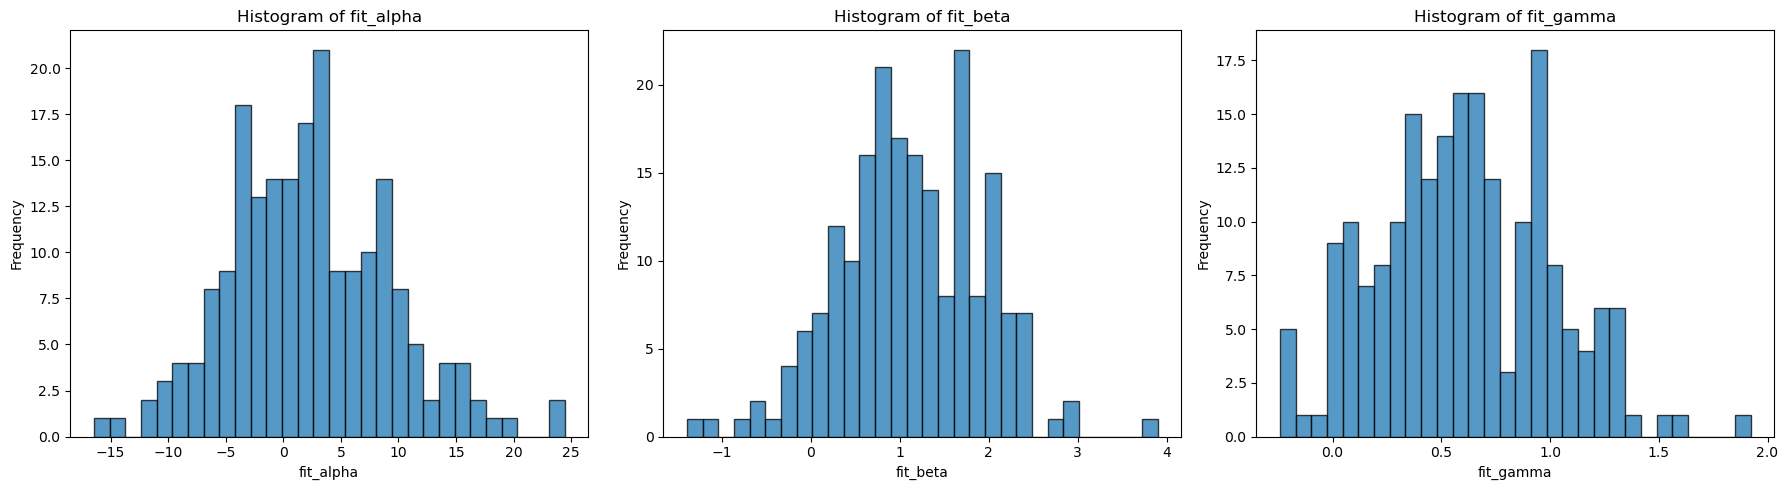

In [31]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(sample_df.columns):
    axs[i].hist(sample_df[col], bins=30, alpha=0.75, edgecolor='black')
    axs[i].set_title(f'Histogram of {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [25]:
kwargs = dict(xscale='log', fontsize=16)
with scv.GridSpec(ncols=3) as pl:
    pl.hist(sample_df['fit_alpha'], xlabel='transcription rate', **kwargs)
    pl.hist(sample_df['fit_beta'] * df['fit_scaling'], xlabel='splicing rate', xticks=[.1, .4, 1], **kwargs)
    pl.hist(sample_df['fit_gamma'], xlabel='degradation rate', xticks=[.1, .4, 1], **kwargs)

,fit_alpha,fit_beta,fit_gamma
0,-1.616754,0.944200,0.267682
1,2.860308,1.956553,1.366471
2,6.991899,0.872973,0.620394
3,1.364182,0.934877,0.189086
4,3.042205,0.259534,0.622617
...,...,...,...
195,10.713494,2.430059,0.926539
196,3.345152,0.524721,0.511034
197,2.398629,1.398221,0.928273
198,17.131583,1.660976,0.666042


In [47]:
df_par.mean()

fit_alpha    2.901458
fit_beta     1.183940
fit_gamma    0.616931
dtype: float64

In [20]:
adata = scv.datasets.simulation(n_obs=5000, n_vars=300, alpha=2.9 , beta=1.2 ,gamma=0.6)

In [21]:
# filter, normalize 
sc.pp.filter_cells(adata,min_counts = 20)
sc.pp.filter_genes(adata,min_cells = 4)
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

In [22]:
adata

AnnData object with n_obs × n_vars = 5000 × 300
    obs: 'true_t', 'n_counts'
    var: 'true_t_', 'true_alpha', 'true_beta', 'true_gamma', 'true_scaling', 'n_cells'
    uns: 'log1p'
    layers: 'unspliced', 'spliced'

In [23]:
sc.pp.pca(adata)
sc.pp.neighbors(adata,n_neighbors = 50 ,n_pcs=0)
sc.tl.umap(adata,min_dist=0.05)
sc.tl.leiden(adata, resolution = 1)

In [24]:
scv.pp.moments(adata, n_pcs=None, n_neighbors=None)

computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [17]:
scv.tl.recover_dynamics(adata)

recovering dynamics (using 1/8 cores)
or disable the progress bar using `show_progress_bar=False`.
    finished (0:02:18) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


In [18]:
scv.tl.velocity(adata, mode='dynamical')

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [19]:
scv.tl.velocity_graph(adata)

computing velocity graph (using 1/8 cores)
    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


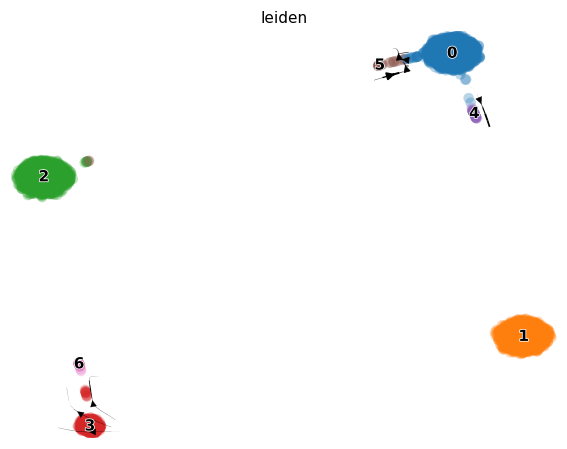

In [63]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    scv.pl.velocity_embedding_stream(adata, basis='umap',color="leiden", dpi=110)

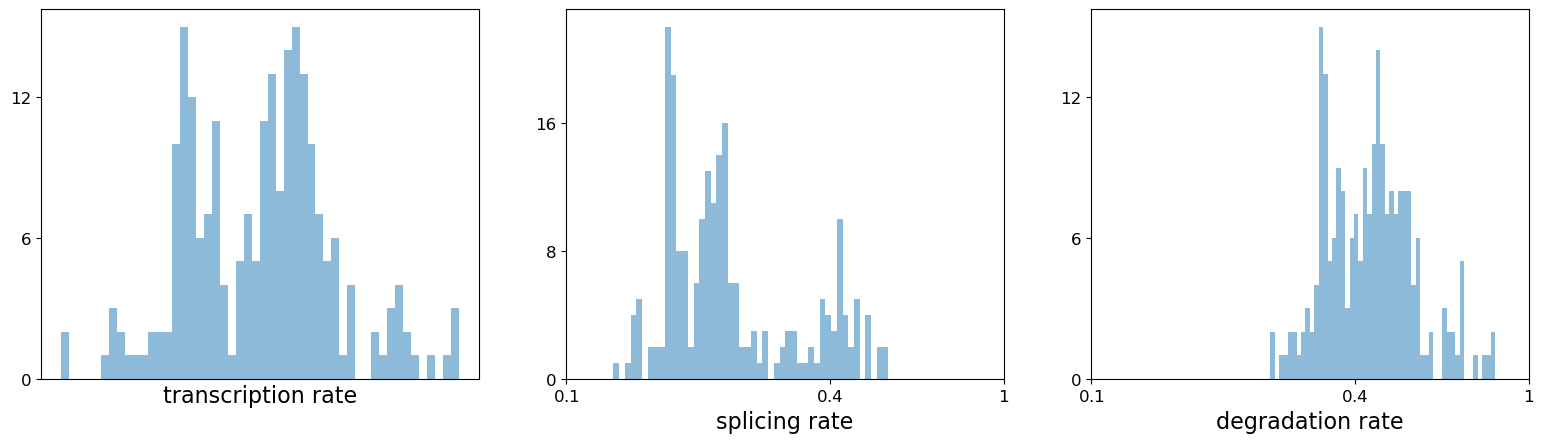

,fit_r2,fit_alpha,fit_beta,fit_gamma,fit_t_,fit_scaling,fit_std_u,fit_std_s,fit_likelihood,fit_u0,fit_s0,fit_pval_steady,fit_steady_u,fit_steady_s,fit_variance,fit_alignment_scaling
0,0.994172,2.662907,1.033833,0.525951,14.735710,0.238017,1.120590,2.224542,2.993214,0.0,0.0,0.413455,2.467591,4.932170,0.005703,1.828749
1,0.991885,1.748753,0.679567,0.335588,19.391896,0.252476,1.062193,2.135108,3.001529,0.0,0.0,0.336595,2.403995,4.858244,0.006402,2.817050
3,0.985442,2.295754,1.000644,0.499031,15.620948,0.412232,0.622856,1.217144,1.138537,0.0,0.0,0.467847,2.407376,4.599991,0.040141,1.952876
4,0.994688,2.321661,0.898310,0.454444,15.412223,0.236654,1.121557,2.239284,3.151456,0.0,0.0,0.414533,2.479640,4.803588,0.005685,2.116763
5,0.992405,1.729115,0.668646,0.334743,19.414948,0.255443,1.066553,2.118967,2.941933,0.0,0.0,0.336181,2.490874,4.832554,0.006971,2.829803


In [64]:
df = adata.var
df = df[(df['fit_likelihood'] > .1) & df['velocity_genes'] == True]
kwargs = dict(xscale='log', fontsize=16)
with scv.GridSpec(ncols=3) as pl:
    pl.hist(df['fit_alpha'], xlabel='transcription rate', **kwargs)
    pl.hist(df['fit_beta'] * df['fit_scaling'], xlabel='splicing rate', xticks=[.1, .4, 1], **kwargs)
    pl.hist(df['fit_gamma'], xlabel='degradation rate', xticks=[.1, .4, 1], **kwargs)

scv.get_df(adata, 'fit*', dropna=True).head()